In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
import warnings
warnings.filterwarnings('ignore')
# from dataprep.clean import clean_headers
from scipy import stats
import re
from wordcloud import WordCloud, STOPWORDS
np.set_printoptions(suppress=True)

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
youtube=pd.read_csv('/content/Global YouTube Statistics.csv',encoding = 'latin-1')

In [6]:
youtube.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [7]:
youtube.reset_index(drop= True, inplace= True)

In [8]:
youtube.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [9]:
youtube.tail()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [10]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [11]:
youtube.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
Abbreviation,122
channel_type,30


In [12]:
youtube.shape

(995, 28)

In [13]:
youtube.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

**Clean columns in the dataset**

In [14]:
youtube.columns = youtube.columns.str.replace('_',' ')
youtube.columns = youtube.columns.str.title()
youtube.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views Rank', 'Country Rank', 'Channel Type Rank',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban Population', 'Latitude', 'Longitude'],
      dtype='object')

In [15]:
yt = youtube[['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category', 'Country', 'Abbreviation', 'Lowest Monthly Earnings', 'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate', 'Population', 'Urban Population', 'Created Year']] #, 'Latitude', 'Longitude'

In [16]:
yt.head(20)

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
0,T-Series,245000000,2.280000e+11,20082,Music,India,IN,564600.0,9000000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0
1,YouTube Movies,170000000,0.000000e+00,1,Film & Animation,United States,US,0.0,0.05,88.2,14.70,3.282395e+08,270663028.0,2006.0
2,MrBeast,166000000,2.836884e+10,741,Entertainment,United States,US,337000.0,5400000.00,88.2,14.70,3.282395e+08,270663028.0,2012.0
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,966,Education,United States,US,493800.0,7900000.00,88.2,14.70,3.282395e+08,270663028.0,2006.0
4,SET India,159000000,1.480000e+11,116536,Shows,India,IN,455900.0,7300000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0
5,Music,119000000,0.000000e+00,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
6,ýýý Kids Diana Show,112000000,9.324704e+10,1111,People & Blogs,United States,US,182900.0,2900000.00,88.2,14.70,3.282395e+08,270663028.0,2015.0
7,PewDiePie,111000000,2.905804e+10,4716,Gaming,Japan,JP,9800.0,156700.00,63.2,2.29,1.262266e+08,115782416.0,2010.0
8,Like Nastya,106000000,9.047906e+10,493,People & Blogs,Russia,RU,12200.0,195800.00,81.9,4.59,1.443735e+08,107683889.0,2016.0
9,Vlad and Niki,98900000,7.718017e+10,574,Entertainment,United States,US,145100.0,2300000.00,88.2,14.70,3.282395e+08,270663028.0,2018.0


**There are some special characters in the data columns 'Youtuber' and 'Title' that need to be processed.**

**So,we need to do PreProcessing**

 **DATA PRE-PROCESSING**

In [17]:
#remove special characters
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

#Youtuber feature
yt['Youtuber'] = yt['Youtuber'].apply(lambda x: re.sub(pattern, '', x))
yt['Youtuber'] = yt['Youtuber'].str.strip()
yt['Youtuber'] = yt['Youtuber'].str.lstrip('- ')

In [18]:
filter_yt_rows = youtube['Youtuber'].str.contains(pattern, regex = True)
filter_yt_rows_results = filter_yt_rows[filter_yt_rows == True]
print("Youtuber's special characters:",filter_yt_rows_results)

Youtuber's special characters: 6      True
55     True
64     True
76     True
91     True
       ... 
970    True
974    True
975    True
979    True
990    True
Name: Youtuber, Length: 110, dtype: bool


**Youtuber's special characters: Series([], Name: Youtuber, dtype: bool)**

In [19]:
yt.head()

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
0,T-Series,245000000,2.280000e+11,20082,Music,India,IN,564600.0,9000000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0
1,YouTube Movies,170000000,0.000000e+00,1,Film & Animation,United States,US,0.0,0.05,88.2,14.70,3.282395e+08,270663028.0,2006.0
2,MrBeast,166000000,2.836884e+10,741,Entertainment,United States,US,337000.0,5400000.00,88.2,14.70,3.282395e+08,270663028.0,2012.0
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,966,Education,United States,US,493800.0,7900000.00,88.2,14.70,3.282395e+08,270663028.0,2006.0
4,SET India,159000000,1.480000e+11,116536,Shows,India,IN,455900.0,7300000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0


In [20]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   Subscribers                              995 non-null    int64  
 2   Video Views                              995 non-null    float64
 3   Uploads                                  995 non-null    int64  
 4   Category                                 949 non-null    object 
 5   Country                                  873 non-null    object 
 6   Abbreviation                             873 non-null    object 
 7   Lowest Monthly Earnings                  995 non-null    float64
 8   Highest Monthly Earnings                 995 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  872 non-null    float64
 10  Unemployment Rate                        872 non-n

In [21]:
yt.shape

(995, 14)

In [22]:
yt.isnull().sum()

,0
Youtuber,0
Subscribers,0
Video Views,0
Uploads,0
Category,46
Country,122
Abbreviation,122
Lowest Monthly Earnings,0
Highest Monthly Earnings,0
Gross Tertiary Education Enrollment (%),123


In [23]:
#As there are lots of missing value in the category variables
#We will filter all missing to 'Other'

#Select category columns
categorical_variables = yt.select_dtypes(include= 'O').columns

#Replace object datatype column missing values with 'Other'
yt[categorical_variables] = yt[categorical_variables].fillna('Other')

In [24]:
yt.isna().sum()

,0
Youtuber,0
Subscribers,0
Video Views,0
Uploads,0
Category,0
Country,0
Abbreviation,0
Lowest Monthly Earnings,0
Highest Monthly Earnings,0
Gross Tertiary Education Enrollment (%),123


In [25]:
yt_not_null = youtube.dropna(subset= ['Gross Tertiary Education Enrollment (%)','Unemployment Rate', 'Population', 'Urban Population'])

#Mean Education Enrollment
mean_edu = round(yt_not_null['Gross Tertiary Education Enrollment (%)'].mean(),1)
print('Mean Gross Tertiary Education Enrollment:', mean_edu)

#Mean Unemployment Rate
mean_unemp = round(yt_not_null['Unemployment Rate'].mean(),1)
print('Mean Unemployment Rate:', mean_unemp)

#Mean Population
mean_popu = round(yt_not_null['Population'].mean(),0)
print('Mean Population:', mean_popu)

#Mean Urban Population
mean_urban = round(yt_not_null['Urban Population'].mean(),0)
print('Mean Urban Population:', mean_urban)


Mean Gross Tertiary Education Enrollment: 63.6
Mean Unemployment Rate: 9.3
Mean Population: 430387267.0
Mean Urban Population: 224214982.0


In [26]:
#There are lots of missing value in the numeric variables
#Replace object datatype column missing values with Mean Values
yt['Gross Tertiary Education Enrollment (%)'] = yt['Gross Tertiary Education Enrollment (%)'].fillna(mean_edu)
yt['Unemployment Rate'] = yt['Unemployment Rate'].fillna(mean_unemp)
yt['Population'] = yt['Population'].fillna(mean_popu)
yt['Urban Population'] = yt['Urban Population'].fillna(mean_urban)

In [27]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   Subscribers                              995 non-null    int64  
 2   Video Views                              995 non-null    float64
 3   Uploads                                  995 non-null    int64  
 4   Category                                 995 non-null    object 
 5   Country                                  995 non-null    object 
 6   Abbreviation                             995 non-null    object 
 7   Lowest Monthly Earnings                  995 non-null    float64
 8   Highest Monthly Earnings                 995 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  995 non-null    float64
 10  Unemployment Rate                        995 non-n

In [28]:
# Convert several float data typescolumns to integers
yt = yt.astype({'Video Views': 'Int64', 'Created Year': 'Int64', 'Population': 'Int64', 'Urban Population': 'Int64'})

In [29]:
# Validate results of datatype change
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   Subscribers                              995 non-null    int64  
 2   Video Views                              995 non-null    Int64  
 3   Uploads                                  995 non-null    int64  
 4   Category                                 995 non-null    object 
 5   Country                                  995 non-null    object 
 6   Abbreviation                             995 non-null    object 
 7   Lowest Monthly Earnings                  995 non-null    float64
 8   Highest Monthly Earnings                 995 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  995 non-null    float64
 10  Unemployment Rate                        995 non-n

In [30]:
#sorting the dataframe and resetting index (by 'Subscribers)
yt = yt.sort_values(by = 'Subscribers', ascending= False).reset_index(drop= True)
yt

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
0,T-Series,245000000,228000000000,20082,Music,India,IN,564600.0,9000000.00,28.1,5.36,1366417754,471031528,2006
1,YouTube Movies,170000000,0,1,Film & Animation,United States,US,0.0,0.05,88.2,14.70,328239523,270663028,2006
2,MrBeast,166000000,28368841870,741,Entertainment,United States,US,337000.0,5400000.00,88.2,14.70,328239523,270663028,2012
3,Cocomelon - Nursery Rhymes,162000000,164000000000,966,Education,United States,US,493800.0,7900000.00,88.2,14.70,328239523,270663028,2006
4,SET India,159000000,148000000000,116536,Shows,India,IN,455900.0,7300000.00,28.1,5.36,1366417754,471031528,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por A,12300000,9029609749,1200,Sports,Brazil,BR,138100.0,2200000.00,51.3,12.08,212559417,183241641,2017
991,Free Fire India Official,12300000,1674409945,1500,People & Blogs,India,IN,16200.0,258900.00,28.1,5.36,1366417754,471031528,2018
992,Panda,12300000,2214684303,2452,Other,United Kingdom,GB,17.0,268.00,60.0,3.85,66834405,55908316,2006
993,RobTopGames,12300000,374123483,39,Gaming,Sweden,SE,968.0,15500.00,67.0,6.48,10285453,9021165,2012


In [31]:
#Statistics table correlation
correlation = yt[['Subscribers', 'Video Views', 'Uploads', 'Lowest Monthly Earnings', 'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate', 'Population', 'Urban Population', 'Created Year']].corr()
correlation

,Subscribers,Video Views,Uploads,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
Subscribers,1.000000,0.750958,0.077136,0.388941,0.388579,-0.006493,-0.007837,0.078378,0.079619,-0.141827
Video Views,0.750958,1.000000,0.165928,0.552096,0.551455,-0.014936,-0.000770,0.078729,0.075230,-0.127068
Uploads,0.077136,0.165928,1.000000,0.166922,0.167283,-0.217351,-0.187373,0.142460,0.072471,-0.154904
Lowest Monthly Earnings,0.388941,0.552096,0.166922,1.000000,0.999955,-0.059060,-0.040869,0.099592,0.077162,0.072316
Highest Monthly Earnings,0.388579,0.551455,0.167283,0.999955,1.000000,-0.058859,-0.040638,0.099575,0.077188,0.072289
Gross Tertiary Education Enrollment (%),-0.006493,-0.014936,-0.217351,-0.059060,-0.058859,1.000000,0.670978,-0.573301,-0.299787,-0.148710
Unemployment Rate,-0.007837,-0.000770,-0.187373,-0.040869,-0.040638,0.670978,1.000000,-0.217695,0.142211,-0.123627
Population,0.078378,0.078729,0.142460,0.099592,0.099575,-0.573301,-0.217695,1.000000,0.909440,0.109691
Urban Population,0.079619,0.075230,0.072471,0.077162,0.077188,-0.299787,0.142211,0.909440,1.000000,0.068092
Created Year,-0.141827,-0.127068,-0.154904,0.072316,0.072289,-0.148710,-0.123627,0.109691,0.068092,1.000000


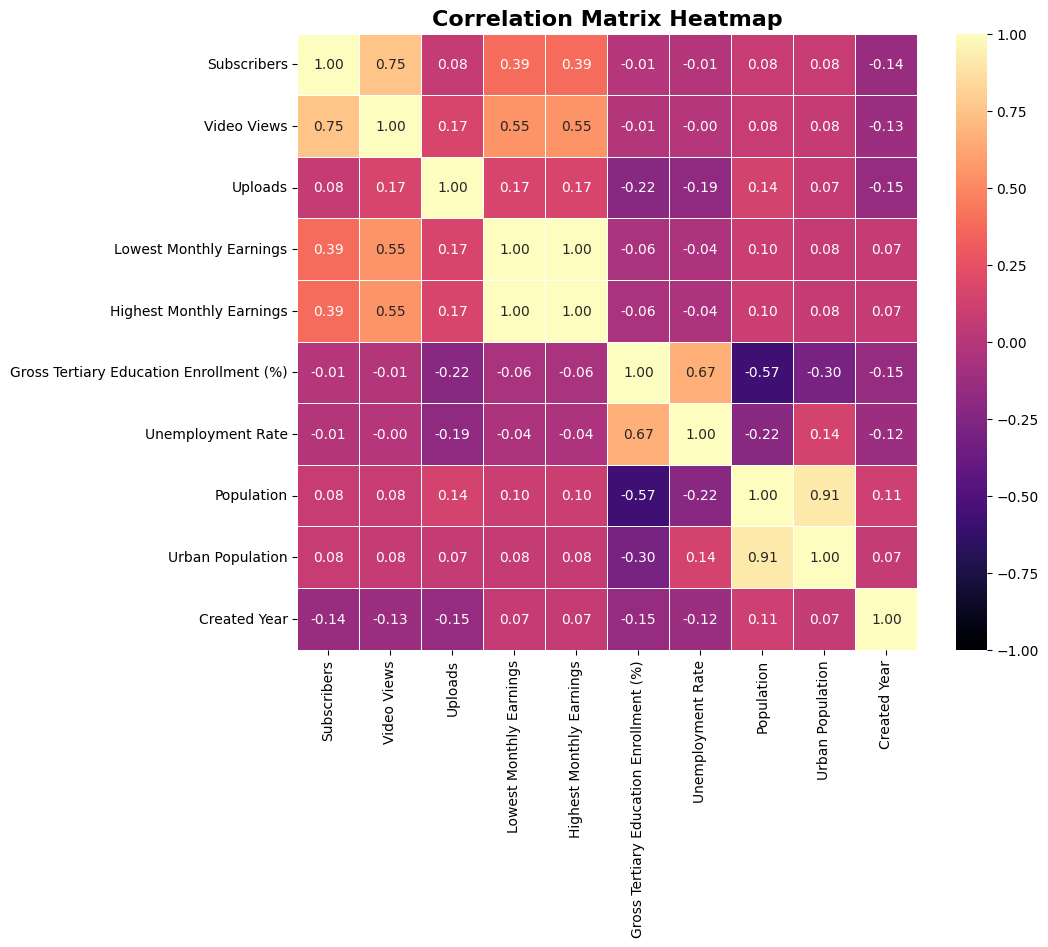

In [32]:
plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16)
sb.heatmap(correlation, annot= True, cmap= 'magma',vmin= -1, vmax= 1, linecolor = 'white', linewidths = 0.5, fmt = '.2f' )
plt.show()

**OBSERVATIONS:**

**The heatmap showing the correlation between continuous variables reveals a relatively high correlation between the variables Subscribers and Video Views.
The correlation of these two variables with the others is at a moderately weak level, with no correlation to the Uploads variable.
The variables Lowest Monthly Earnings and Highest Monthly Earnings show an absolute correlation of 100%. Let's explore the correlation of variables in more detail by visualizing it through scatter plots.**

<Axes: >

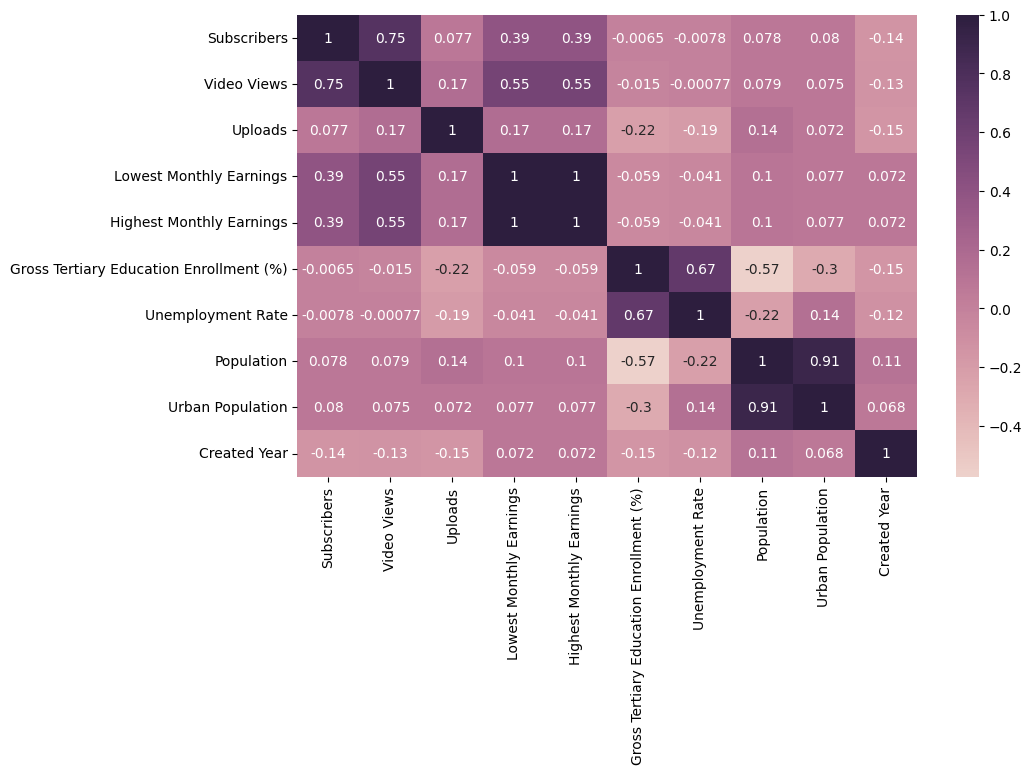

In [33]:
# Select only numeric and boolean columns for correlation
h_labels = [x.replace('_', ' ').title() for x in list(yt.select_dtypes(include=['number', 'bool']).columns.values)]

# Create the correlation matrix using selected columns
corr_matrix = yt.select_dtypes(include=['number', 'bool']).corr()

# Generate the heatmap plot with the corrected data
fig, ax = plt.subplots(figsize=(10, 6))
sb.heatmap(corr_matrix, annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sb.cubehelix_palette(as_cmap=True), ax=ax)


***Inference:***

**Therefore, it's not as simple as training a single ML model to improve SEO results. Instead, it involves using a combination of tools and techniques, which can include ML algorithms such as the ones mentioned above, to improve a site's visibility and ranking.**

**ML Algorithmns used for Better Search**

Support Vector Machines (SVM) Classification is the process that facilitates segmentation

K-Nearest neighbors algorithm

K-means clustering algorithms

Popular ML models for SEO include Natural Language Processing (NLP) and "RankBrain" (a Google algorithm that uses machine learning techniques to rank web pages)

Learning to Rank (LTR)

Decision trees

**Considered video data from US and IN for analysis**

In [34]:
import numpy as np
import pandas as pd
import json
import datetime


In [35]:
import re
import nltk
from nltk.corpus import stopwords


In [36]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [37]:
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [47]:
df = pd.read_csv('/content/US_youtube_trending_data.csv')

In [48]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [49]:
df.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220588 entries, 0 to 220587
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           220588 non-null  object
 1   title              220588 non-null  object
 2   publishedAt        220588 non-null  object
 3   channelId          220588 non-null  object
 4   channelTitle       220588 non-null  object
 5   categoryId         220588 non-null  int64 
 6   trending_date      220588 non-null  object
 7   tags               220588 non-null  object
 8   view_count         220588 non-null  int64 
 9   likes              220588 non-null  int64 
 10  dislikes           220588 non-null  int64 
 11  comment_count      220588 non-null  int64 
 12  thumbnail_link     220588 non-null  object
 13  comments_disabled  220588 non-null  bool  
 14  ratings_disabled   220588 non-null  bool  
 15  description        216261 non-null  object
dtypes: bool(2), int64(5)

In [54]:
#Lets remove "video_id" and "thumbnail_link" we wont be needing those

df.drop(columns=['video_id','thumbnail_link'],inplace=True, errors='ignore')
#Lets check that if we had successfully removed the columns.
df.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


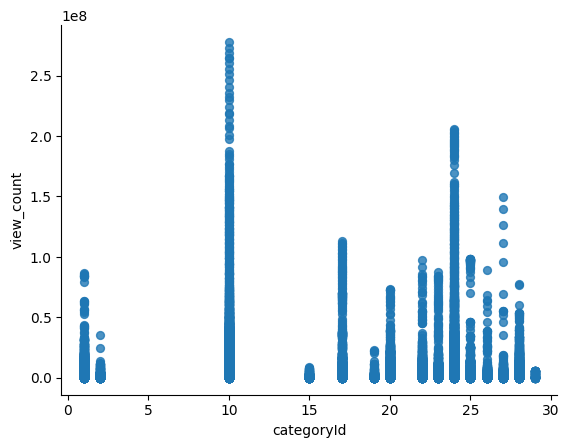

In [56]:
# @title category_id vs views

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='categoryId', y='view_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

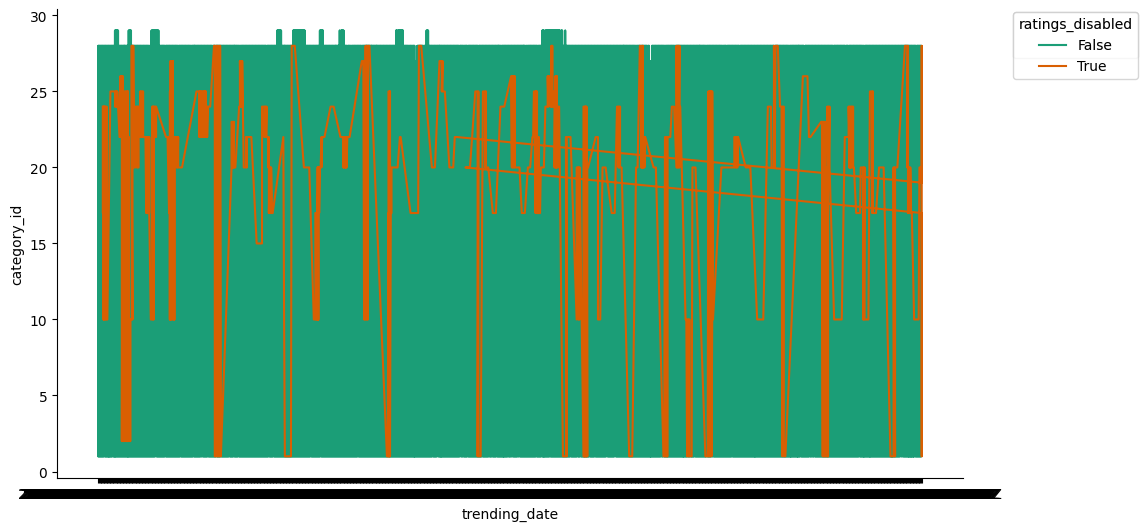

In [58]:
# @title trending_date vs category_id

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['trending_date']
  ys = series['categoryId']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('trending_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ratings_disabled')):
  _plot_series(series, series_name, i)
  fig.legend(title='ratings_disabled', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('trending_date')
_ = plt.ylabel('category_id')

In [46]:
def clean_tags(tag):
    if tag == '[none]': return []
    return tag.lower().replace('"','').split('|')

    df['tags'] = df['tags'].apply(clean_tags)
df.head(n=2)


,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


In [59]:
def clean_trending_date(date):
    y,m,d = date.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

**Natural Language processing for Title**

In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
def clean_titles(title):
    if isinstance(title, str):  # Check if the value is a string
        tokens = title.lower().split()
        cleaned = []
        sw = set(stopwords.words('english'))
        for token in tokens:
            if token.startswith('$') or token.isnumeric() or not token.isalnum() or token in sw:  # Remove money amount, non-alphanumeric tokens, or stopwords
                continue
            else:
                cleaned.append(token)
        return ' '.join(cleaned)
    else:  # Handle NaN values by returning an empty string or another appropriate value
        return ''  # Replace with the desired handling for NaN values

df['title_cl'] = df['title'].apply(clean_titles)


In [63]:
#Lets check for result
df.head(n=10)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,title_cl
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,asked
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",apex legends stories outlands
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,left youtube month
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,xxl freshman class revealed official announcement
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,ultimate diy home movie theater labrant
5,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,False,False,Subscribe To My Channel - https://www.youtube....,honest truth
6,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2020-08-12T00:00:00Z,[None],470446,47990,440,4558,False,False,Hi babygirls! Thank you so much for watching ...,first family
7,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...,cgp grey wrong
8,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,False,False,"Since I was little, i've had these goals for m...",surprising dad dream life
9,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113983,4373,5618,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...,ovi x natanael cano x aleman x big soto vengo ...


**Data Visualization**

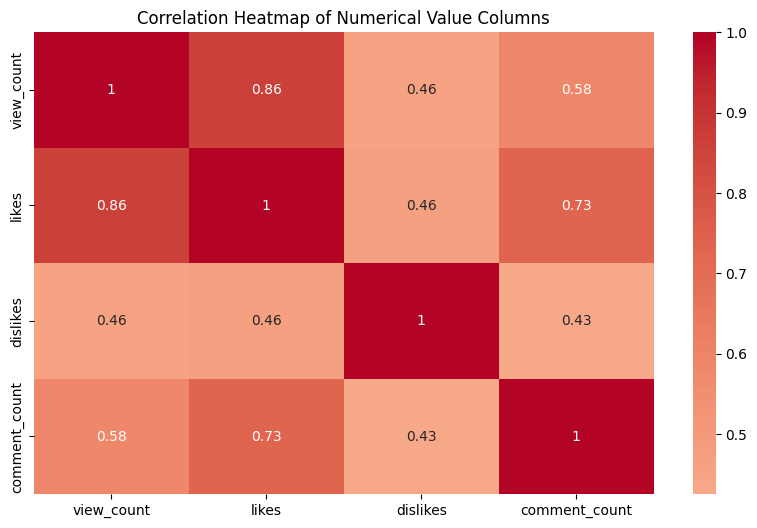

In [65]:
# Select numerical columns
numerical_columns = ['view_count', 'likes', 'dislikes', 'comment_count']

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Value Columns')
plt.show()


In [67]:
#Title Word Choice
#Now that we have nicely cleaned our data, we will start analysing our data. We will start from what words are mostly used in video titles by counting how many the same words has been used and folow on after that first lets find them.

cnt = Counter()

# Finding the occurence of words in video titles
for title in df['title_cl']:
    for token in title.split():
        cnt[token] += 1

In [68]:
# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

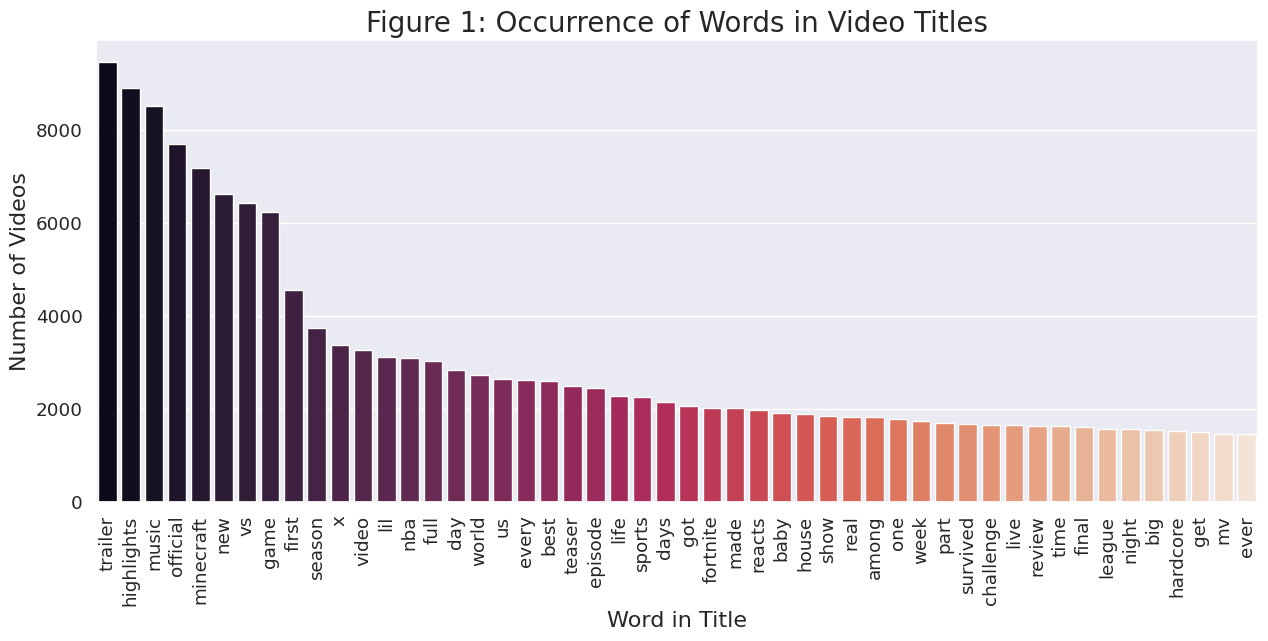

In [69]:
# Graphing number of times the world occure in title
fig= plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

sns.barplot(x=top_words,y=freqs, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Figure 1: Occurrence of Words in Video Titles', fontsize=20)
plt.show()

**Inference**

From above figure, We can see that the top ten words are trailer, highlights, music, official, minecraft, new, vs, game, first, season it seems that some words quict nicely go together like "official trailer", "new music", "official music", "new game", "new season", "new minecraft season", etc..

**Video Catagories in Trending**

In [71]:
#We need to import json so that we can use its contents.

with open("/content/US_category_id (1).json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [72]:
ID_to_Category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [73]:
ID_to_Category.keys()

dict_keys([1, 2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [91]:
df['category'] = df['categoryId'].apply(lambda x: ID_to_Category.get(x, 'Unknown'))


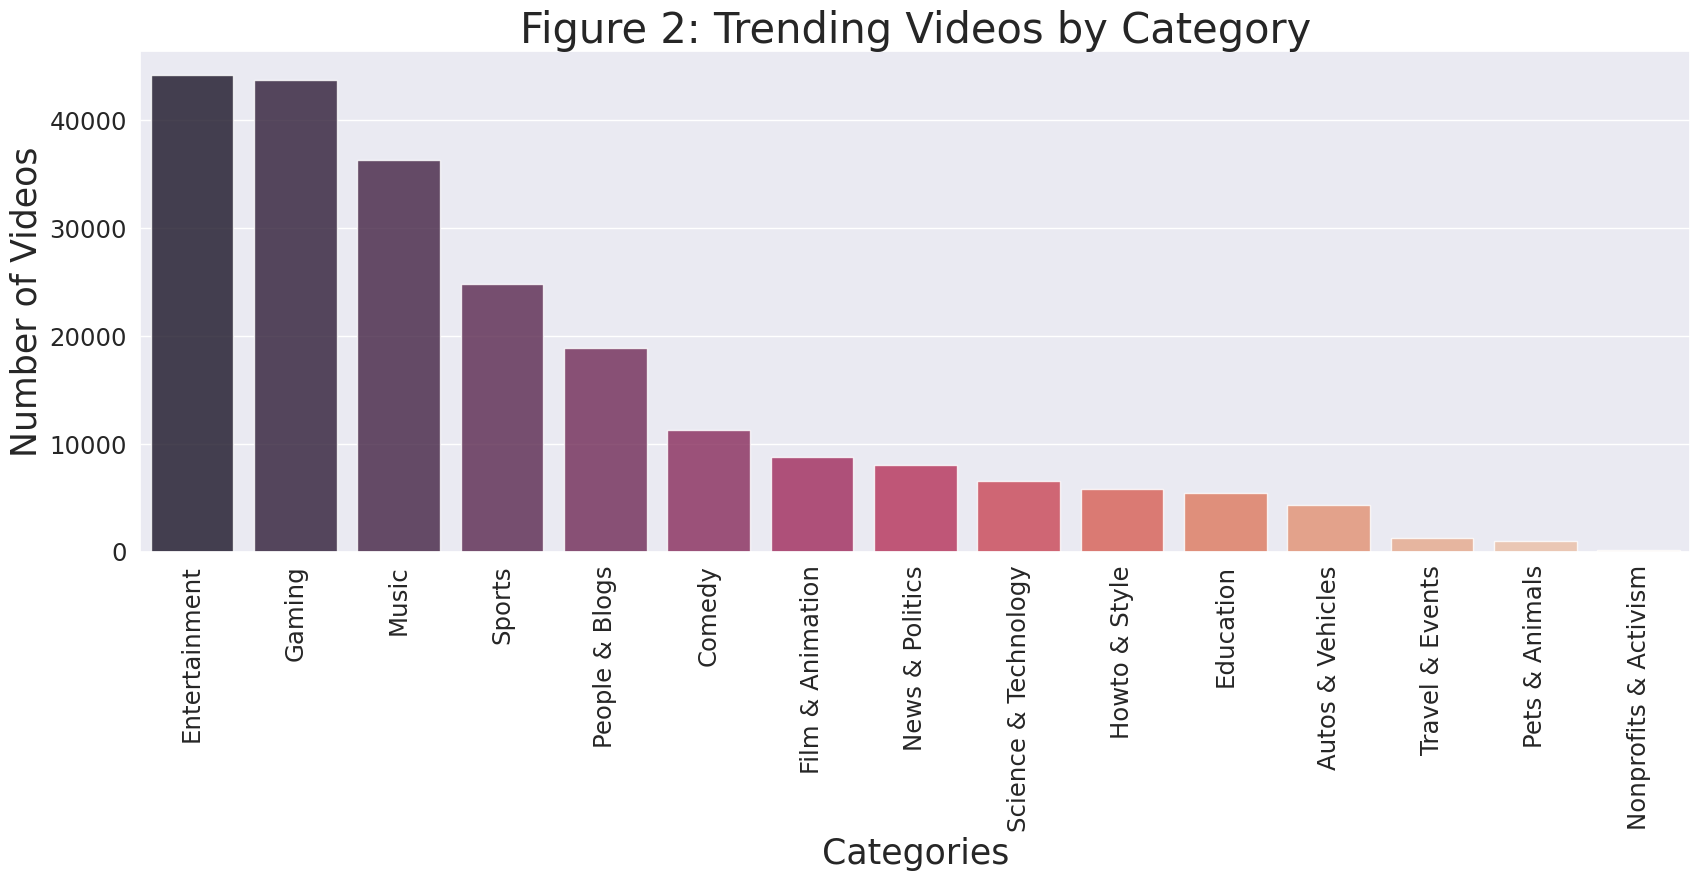

In [92]:
#Video Catagories
#Now we will find what catagory of trending videos are most and least common by looking at the frequencies of video categories.

# Bar graph for number of videos per category
sns.set_style("darkgrid")
sns.set(font_scale=1.6)

categories = df['categoryId'].value_counts()

plt.figure(figsize=(20,6.5))
sns.barplot(x=categories.index, y=categories.values, alpha=0.8, palette="rocket")

sns.set(font_scale=1.6)
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 2: Trending Videos by Category', fontsize=30)
plt.show()


**Inference from Above Figure**

* We can see that the Entertainment category has the most number of trending
videos with about 45,000 approximate which accounts for about a one fifth of the videos in this dataset.

* Similarly we can also see that the Gaming category has almost same but less amount of videos about 42,000 approximate which accounts for another one fifth of the videos in the dataset.

* The Music category has video count below 40,000 but no other category has even reached 30,000 other then music but lets not negate the fact that the sport category has over 25,000 video count other then these four major category rest of them doesnt even have 20,000 video count.





**Checking Percentage of these four categories more acurately
Also for least 3 categories**

In [93]:
# Calculating the percentages for top 4 categories
entertainment = df[df['categoryId'] == 'Entertainment']['categoryId'].count() / df['categoryId'].count() * 100
gaming = df[df['categoryId'] == 'Gaming']['categoryId'].count() / df['categoryId'].count() * 100
music = df[df['categoryId'] == 'Music']['categoryId'].count() / df['categoryId'].count() * 100
sports = df[df['categoryId'] == 'Sports']['categoryId'].count() / df['categoryId'].count() * 100

In [95]:
#Lets print the percentages
print("Top 5:")
print("Entertainment:",entertainment)
print("Gaming:",gaming)
print("Music:",music)
print("Sports:",sports)

Top 5:
Entertainment: 20.05050138720148
Gaming: 19.833807822728346
Music: 16.47777757629608
Sports: 11.257185340997697


In [96]:
# Calculating the percentages for bottom 3 categories
travelandevents = df[df['categoryId'] == 'Travel & Events']['categoryId'].count() / df['categoryId'].count() * 100
petsandanimals = df[df['categoryId'] == 'Pets & Animals']['categoryId'].count() / df['categoryId'].count() * 100
nonprofits = df[df['categoryId'] == 'Nonprofits & Activism']['categoryId'].count() / df['categoryId'].count() * 100

In [97]:
print("Least 3:")
print("Travel & Events:",travelandevents)
print("Pets & Animals",petsandanimals)
print("Nonprofits & Activism",nonprofits)

Least 3:
Travel & Events: 0.5684806063793134
Pets & Animals 0.4556004859738517
Nonprofits & Activism 0.05168005512539213


**Inference**

After doing the calculation for the percentages of categories, it is noteworthiy that

 Entertainment(20.05%),

  Gaming(19.79%),

   Music(16.49%),

   Sports(11.24%)
   
   make up 67.67% of the trending videos. The common thing is that these type of videos are mostly leisure type except for sports.



**Channel Frequencies**

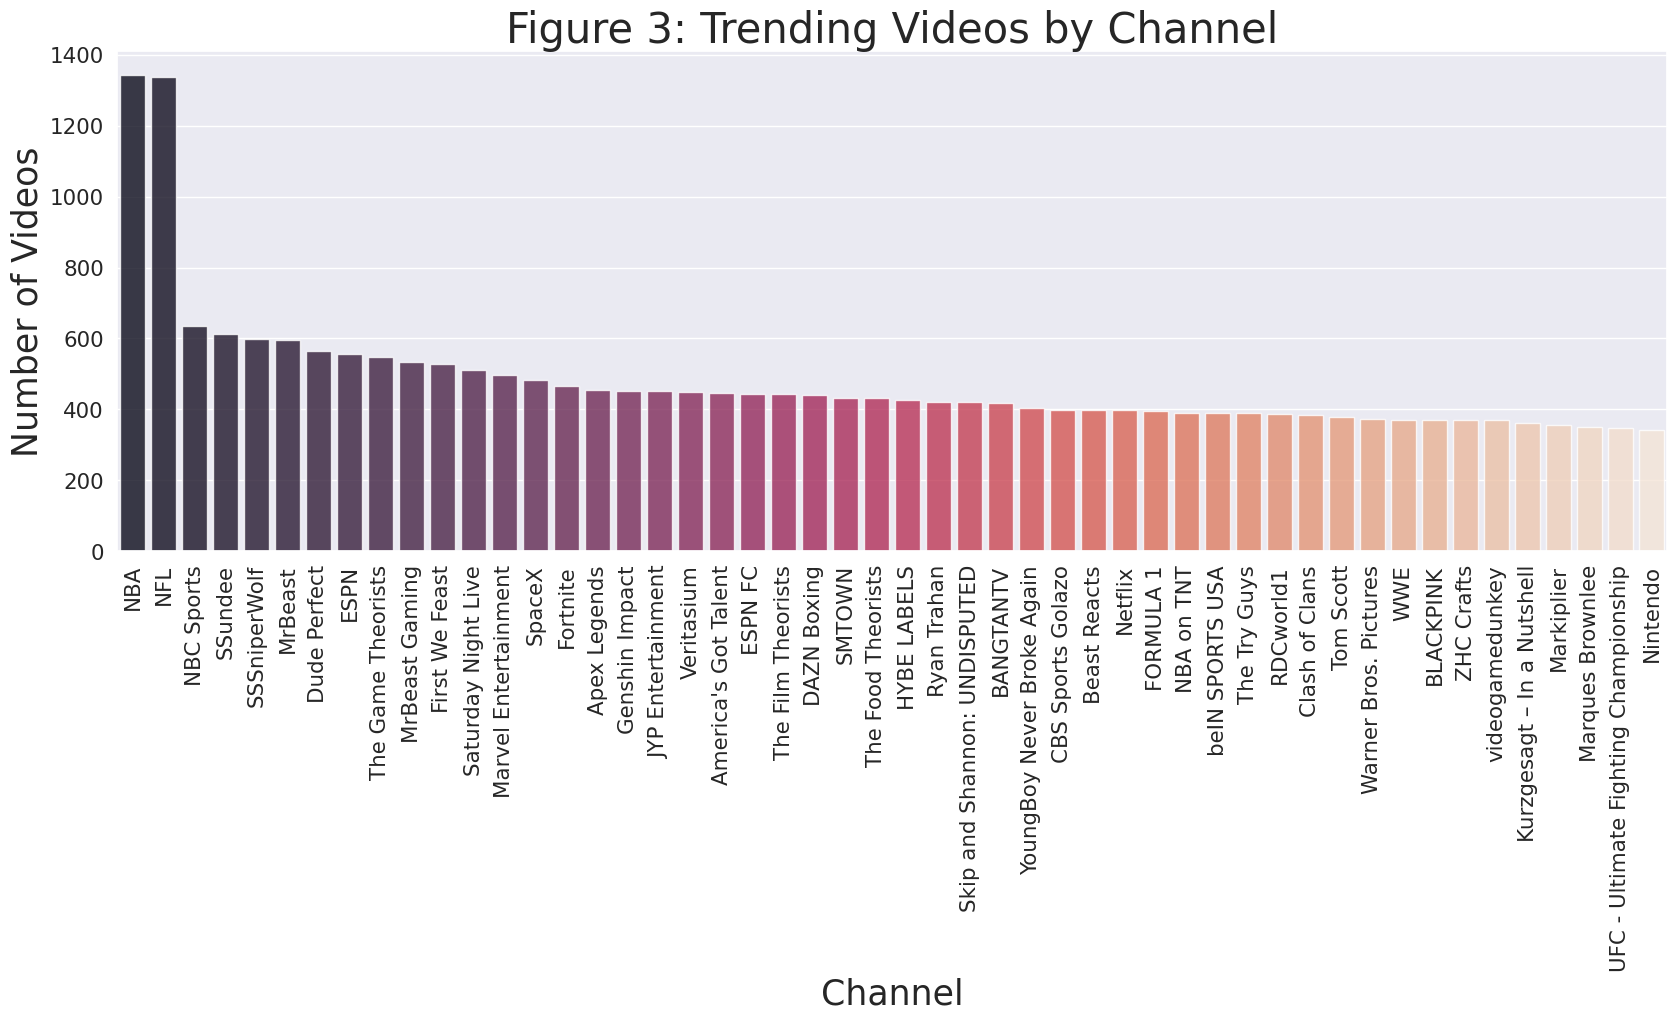

In [99]:
#Channel Frequencies
#Now lets see which chanels have a large number of trending videos. Based on our previous catagory analysis, we can assume that the channels with the most number of trending videos will be Entertainment, Gaming, Music and Sports chanel.

#We can start by calculating the trending video frequency for each channel.

sns.set_style("darkgrid")
sns.set(font_scale=1.4)

channel_freq = df['channelTitle'].value_counts()
channel_freq = channel_freq[0:50]

# Bar graph for number of videos for the top 50 channels
plt.figure(figsize=(20, 6.5))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 3: Trending Videos by Channel', fontsize=30)
plt.show()


**Categories of Channels with Most Trending Videos**

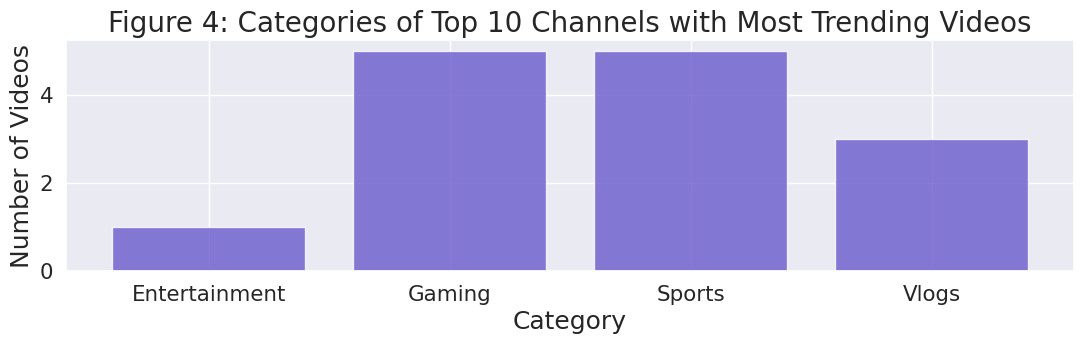

In [100]:
d = {'Entertainment': 1, 'Gaming': 5, 'Sports': 5, 'Vlogs': 3}

# Bar graph for the number of videos per category for the top 10 channels with trending videos
plt.figure(figsize=(13,3))
plt.bar(range(len(d)), list(d.values()), align='center', alpha=0.8,
        color="slateblue")
plt.xticks(range(len(d)), list(d.keys()))
plt.xlabel("Category", fontsize=18)
plt.ylabel("Number of Videos",fontsize=18)
plt.title('Figure 4: Categories of Top 10 Channels with Most Trending Videos',
          fontsize=20)
plt.show()

**Histogram for channel frequencies**

Text(0.5, 1.0, 'Figure 5: Frequency of Channels with Trending Videos')

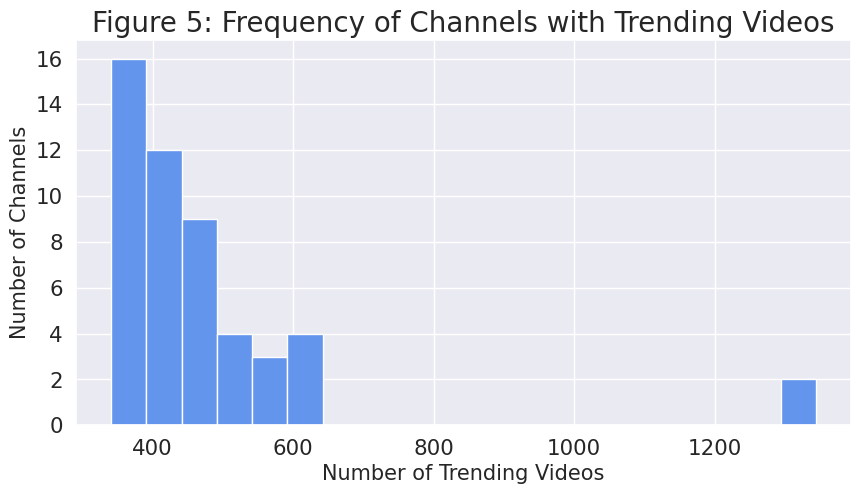

In [101]:
# Histogram for channel frequencies
plt.figure(figsize=(10,5))
channel_freq.hist(bins=20, color="cornflowerblue")
plt.xlabel("Number of Trending Videos", fontsize=15)
plt.ylabel("Number of Channels", fontsize=15)
plt.title('Figure 5: Frequency of Channels with Trending Videos', fontsize=20)

**Inference:**

This histogram, Figure 5, helps us understand why the top 10 channels with trending videos may not match with the exploration of categories we did earlier as the distribution is extremely right skewed. Only 2 chanels have 1350 trending videos, while we have a few channels with over 600 videos. We will calculate the percentages fo the number of trending videos that channels have to look at the distribution more closely.

**Learning to Rank (LTR)**

In [102]:
pip install lightgbm


In [103]:
import lightgbm as lgb
import numpy as np
import pandas as pd

In [104]:
from sklearn.model_selection import train_test_split

In [106]:
# Load the YouTube video dataset from the CSV file
YT = pd.read_csv('/content/US_youtube_trending_data.csv')


In [107]:
YT.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [109]:
YT.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


**Define features and target variable**

In [113]:
X = YT[['categoryId','likes','dislikes','comment_count']]
y = YT['view_count']

In [114]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
# Define the LTR model
ltr_model = lgb.LGBMRanker()

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# True labels and predicted labels
y_true = [0, 1, 0, 0, 1, 0, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 1, 0, 0, 1, 1, 0]

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

# ROC-AUC Score (for binary classification only)
roc_auc = roc_auc_score(y_true, y_pred)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8
ROC-AUC Score: 0.8333333333333333
